# Machine Learning Classification Strategy In Python

In [1]:
# importing the libraries

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [11]:
# data manipulation
import pandas as pd

import numpy as np

In [8]:
# to plot
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# fetching data

import yfinance as yf
data= yf.download('SPY',start="2017-01-01", end="2022-01-01")
df=data.dropna()

[*********************100%***********************]  1 of 1 completed


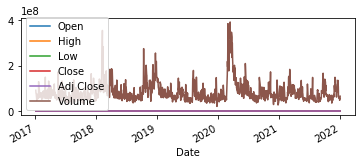

In [6]:
df.plot(figsize=(6,2))


Text(0.5, 0, 'weerfjrnfj')

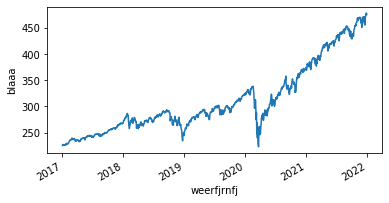

In [7]:
df.Close.plot(figsize=(6,3))
plt.ylabel("blaaa")
plt.xlabel("weerfjrnfj")

In [9]:
# Determine the target variable

target variable is whether the S&P500 price will increase or decrease the next trading day.

We will first determine the actual trading signal using the following logic:

1.If the next trading day's close price is greater than today's close price, then we will buy the S&P500 index.

2.Else we will sell the S&P500 index.

3.We will store +1 for the buy signal and -1 for the sell signal.

4.We use .shift to shift the close price column. The parameter of -1 indicates we move the next day’s closing price up.

In [13]:
y=np.where (data['Close'].shift(-1)>data['Close'] ,1,-1)

In [14]:
# Creation of predictors variables

In [21]:
data['Open-Close'] = data.Open - data.Close
data['High-Low'] = data.High - data.Low
x=data[['Open-Close','High-Low']]

In [17]:
#Test and train dataset

First, 80% of data is used for training and the remaining data for testing

x_train and y_train are train dataset

x_test and y_test are test dataset

In [19]:
split_percent=0.8
split=int(split_percent*len(data))


In [27]:
#train

x_train=x[:split]
y_train=y[:split]

In [28]:
#testing 
x_test=x[split:]
y_test=y[split:]

In [29]:
#Create the machine learning classification model using the train dataset

In [31]:
clas=SVC().fit(x_train,y_train)

C:\Users\aardr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [32]:
#The classification model accuracy_score in Python

we compute accuracy of the model by comparing the actual value with the predicted value

In [34]:
train_acc=accuracy_score(y_train,clas.predict(x_train))
test_acc=accuracy_score(y_test,clas.predict(x_test))

In [43]:
print('Train Accuracy:{:.3f}%'.format(train_acc*100))

print('test accuracy:{:.2f}%'.format(test_acc*100))

Train Accuracy:59.285%
test accuracy:56.75%


In [44]:
#Prediction

In [47]:
data['Predicted_Signal'] = clas.predict(X)

# Calculate log returns
data['Return'] = np.log(data.Close.shift(-1) / data.Close)*100
data['Strategy_Return'] = data.Return * data.Predicted_Signal

In [48]:
#Plotting classification data in matplotlib

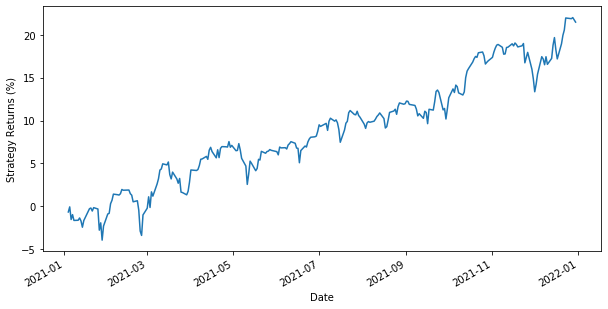

In [50]:
data.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.show()